# Лабораторная работа №4

ФИО: Беледа Владислав Валентинович  
Группа: БИВТ-21-4

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных. Грузим данные

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
db = pd.read_csv('https://github.com/ta-k1/Beleda_Vladislav_BIVT-24-1/raw/main/winequality-red.csv')

## 2. Понимаем, какая перед нами задача

In [106]:
db.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Quality Distribution')

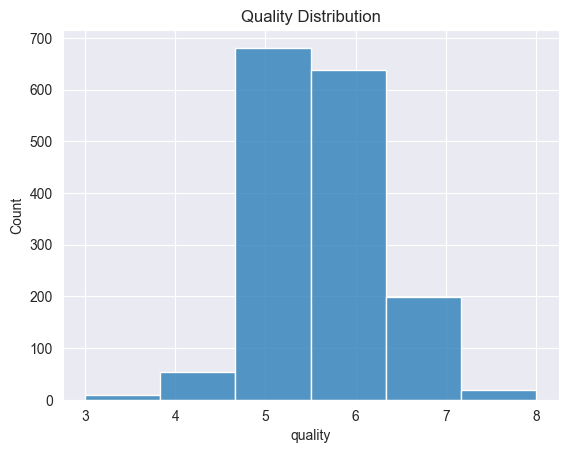

In [107]:
palette = sns.color_palette('deep') 
sns.histplot(data=db, x='quality', bins=6)
plt.title("Quality Distribution")

## 3. Делаем предобработку данных

In [108]:
## Логарифмирование

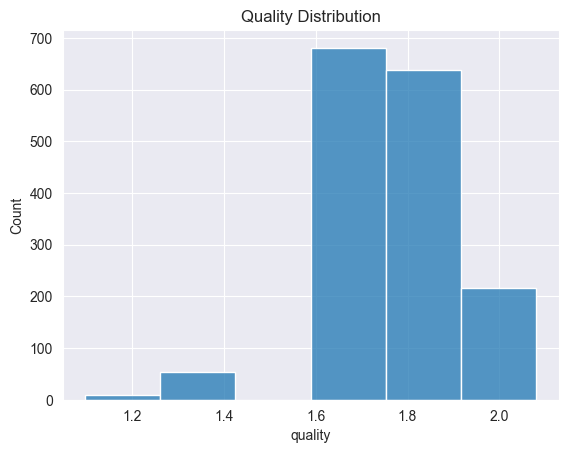

In [109]:
db['quality'] = np.log(db['quality'])
sns.histplot(data=db, x='quality', bins=6)
plt.title("Quality Distribution")
plt.show()

In [110]:
db

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.609438
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.609438
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.609438
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.791759
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.609438
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.791759
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1.791759
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.609438


## Проверка и ликвидация пропусков

In [111]:
db.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропусков нет

## Кодирование категориальных данных

In [112]:
from sklearn.preprocessing import LabelEncoder

db['fixed acidity'] = LabelEncoder().fit_transform(db['fixed acidity']) 
db['volatile acidity'] = LabelEncoder().fit_transform(db['volatile acidity']) 
db['citric acid'] = LabelEncoder().fit_transform(db['citric acid']) 
db['residual sugar'] = LabelEncoder().fit_transform(db['residual sugar']) 
db['chlorides'] = LabelEncoder().fit_transform(db['chlorides']) 
db['free sulfur dioxide'] = LabelEncoder().fit_transform(db['free sulfur dioxide']) 
db['total sulfur dioxide'] = LabelEncoder().fit_transform(db['total sulfur dioxide']) 
db['density'] = LabelEncoder().fit_transform(db['density']) 
db['pH'] = LabelEncoder().fit_transform(db['pH']) 
db['sulphates'] = LabelEncoder().fit_transform(db['sulphates']) 
db['alcohol'] = LabelEncoder().fit_transform(db['alcohol'])

## Разделение выборки на тренировочную и тестовую

In [113]:
X = db.drop(['quality'], axis=1)
y = db['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [114]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


## Нормирование численных переменных

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

# 4. Класс Datasets

In [117]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision.transforms import ToTensor, Normalize, Lambda
import copy
import datetime as dt
import pandas as pd
import numpy as np

In [118]:
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data.select_dtypes(include=[np.number])
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = torch.tensor(self.data.iloc[index], dtype=torch.float32)
        y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)

        return x, y

In [119]:
train_dataset = CustomDataset(X_train_df, y_train_df)
test_dataset = CustomDataset(X_test_df, y_test_df)

In [120]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [121]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[0.2316, 0.6268, 0.0263, 0.1910, 0.1733, 0.5932, 0.4014, 0.7517, 0.7907,
         0.4301, 0.2812],
        [0.5263, 0.0986, 0.5263, 0.0449, 0.2400, 0.2373, 0.1056, 0.3954, 0.2907,
         0.1398, 0.5000],
        [0.6000, 0.0845, 0.7105, 0.2697, 0.4533, 0.0678, 0.0915, 0.8851, 0.4186,
         0.2688, 0.1875],
        [0.3474, 0.6901, 0.3289, 0.3708, 0.2600, 0.5763, 0.5634, 0.6023, 0.3488,
         0.0430, 0.1094],
        [0.1895, 0.4366, 0.4342, 0.1011, 0.1467, 0.2712, 0.1549, 0.3471, 0.5465,
         0.2796, 0.3438],
        [0.2947, 0.2817, 0.2500, 0.1124, 0.2600, 0.1695, 0.2676, 0.4184, 0.5814,
         0.1720, 0.2500],
        [0.3368, 0.2324, 0.2763, 0.0562, 0.4600, 0.1695, 0.2183, 0.5885, 0.3256,
         0.5699, 0.1875],
        [0.1368, 0.2887, 0.0000, 0.0337, 0.1333, 0.2542, 0.1408, 0.2161, 0.5465,
         0.0753, 0.1875],
        [0.3579, 0.6479, 0.3026, 0.2472, 0.1467, 0.0678, 0.0634, 0.6598, 0.5581,
         0.1935, 0.5781],
        [0.0316, 0.9366, 0.31

C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


# 5. Обучение на тренировочном множестве

In [122]:
from torch import nn

## Однослойная нейросеть

In [130]:
input_size = 11
output_size = 1
learning_rate = 1e-2

In [131]:
first_model = nn.Linear(input_size, output_size)

In [132]:
loss_fn1 = nn.MSELoss()
first_optimizer =  torch.optim.SGD(first_model.parameters(), lr=learning_rate)

In [133]:
first_model.train()

Linear(in_features=11, out_features=1, bias=True)

In [134]:
num_epochs = 25

In [135]:
train_losses = []
test_losses = []

In [136]:
def calculate_loss(model, loss_fn, data_loader):
    total_loss = 0.0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_samples += inputs.size(0)
    return total_loss / total_samples

for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:
        first_optimizer.zero_grad()
        outputs = first_model(inputs)
        loss = loss_fn1(outputs, targets)
        loss.backward()
        first_optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    first_model.eval()
    test_loss = calculate_loss(first_model, loss_fn1, test_loader)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Epoch 1/25, Train Loss: 1.0700, Test Loss: 0.3282
Epoch 2/25, Train Loss: 0.1702, Test Loss: 0.0746
Epoch 3/25, Train Loss: 0.0551, Test Loss: 0.0431
Epoch 4/25, Train Loss: 0.0395, Test Loss: 0.0389
Epoch 5/25, Train Loss: 0.0366, Test Loss: 0.0377
Epoch 6/25, Train Loss: 0.0355, Test Loss: 0.0368
Epoch 7/25, Train Loss: 0.0346, Test Loss: 0.0359
Epoch 8/25, Train Loss: 0.0338, Test Loss: 0.0352
Epoch 9/25, Train Loss: 0.0330, Test Loss: 0.0345
Epoch 10/25, Train Loss: 0.0324, Test Loss: 0.0338
Epoch 11/25, Train Loss: 0.0317, Test Loss: 0.0332
Epoch 12/25, Train Loss: 0.0312, Test Loss: 0.0326
Epoch 13/25, Train Loss: 0.0307, Test Loss: 0.0321
Epoch 14/25, Train Loss: 0.0301, Test Loss: 0.0315
Epoch 15/25, Train Loss: 0.0297, Test Loss: 0.0311
Epoch 16/25, Train Loss: 0.0293, Test Loss: 0.0307
Epoch 17/25, Train Loss: 0.0289, Test Loss: 0.0303
Epoch 18/25, Train Loss: 0.0285, Test Loss: 0.0299
Epoch 19/25, Train Loss: 0.0282, Test Loss: 0.0296
Epoch 20/25, Train Loss: 0.0278, Test Lo

Значение Test Loss (0.0279) значительно ниже, чем Train Loss (0.0265). Это указывает на то, что модель хорошо обобщает данные и показывает отличные результаты на новых данных (тестовых данных). Такие результаты могут свидетельствовать о том, что модель корректно обучена и способна эффективно работать на новых данных, что является очень хорошим показателем качества модели.

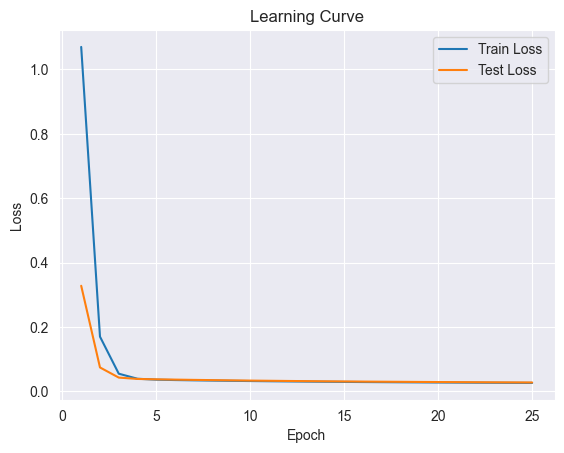

In [142]:
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss') 
plt.plot(epochs, test_losses, label='Test Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Learning Curve') 
plt.legend() 
plt.show()

## Нейросеть с одним скрытым слоем

In [143]:
hidden_size = 4

In [144]:
second_model = nn.Sequential()
second_model.add_module("first", nn.Linear(input_size, hidden_size))
second_model.add_module("first_activation", nn.Sigmoid())
second_model.add_module("second", nn.Linear(hidden_size, output_size))

In [145]:
loss_fn2 = nn.MSELoss()
second_optimizer = torch.optim.Adam(second_model.parameters(), lr=learning_rate)
second_model.train()

Sequential(
  (first): Linear(in_features=11, out_features=4, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=4, out_features=1, bias=True)
)

In [146]:
train_losses = []
test_losses = []

In [147]:
def calculate_loss(model, loss_fn, data_loader):
    total_loss = 0.0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_samples += inputs.size(0)
    return total_loss / total_samples

for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:
        second_optimizer.zero_grad()
        outputs = second_model(inputs)
        loss = loss_fn2(outputs, targets)
        loss.backward()
        second_optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    first_model.eval()
    test_loss = calculate_loss(second_model, loss_fn2, test_loader)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Epoch 1/25, Train Loss: 0.3537, Test Loss: 0.0303
Epoch 2/25, Train Loss: 0.0347, Test Loss: 0.0345
Epoch 3/25, Train Loss: 0.0260, Test Loss: 0.0244
Epoch 4/25, Train Loss: 0.0232, Test Loss: 0.0227
Epoch 5/25, Train Loss: 0.0220, Test Loss: 0.0218
Epoch 6/25, Train Loss: 0.0211, Test Loss: 0.0211
Epoch 7/25, Train Loss: 0.0203, Test Loss: 0.0203
Epoch 8/25, Train Loss: 0.0195, Test Loss: 0.0196
Epoch 9/25, Train Loss: 0.0188, Test Loss: 0.0189
Epoch 10/25, Train Loss: 0.0181, Test Loss: 0.0183
Epoch 11/25, Train Loss: 0.0173, Test Loss: 0.0178
Epoch 12/25, Train Loss: 0.0167, Test Loss: 0.0173
Epoch 13/25, Train Loss: 0.0162, Test Loss: 0.0169
Epoch 14/25, Train Loss: 0.0158, Test Loss: 0.0167
Epoch 15/25, Train Loss: 0.0157, Test Loss: 0.0164
Epoch 16/25, Train Loss: 0.0152, Test Loss: 0.0163
Epoch 17/25, Train Loss: 0.0150, Test Loss: 0.0161
Epoch 18/25, Train Loss: 0.0148, Test Loss: 0.0161
Epoch 19/25, Train Loss: 0.0147, Test Loss: 0.0160
Epoch 20/25, Train Loss: 0.0146, Test Lo

В данном случае, значения Train Loss и Test Loss очень близки друг к другу. Это может указывать на то, что модель не переобучена (так как ошибка на тренировочных данных не сильно ниже, чем на тестовых данных), но также значение loss близко к нулю, это указывает на то, что модель хорошо справляется с задачей. 

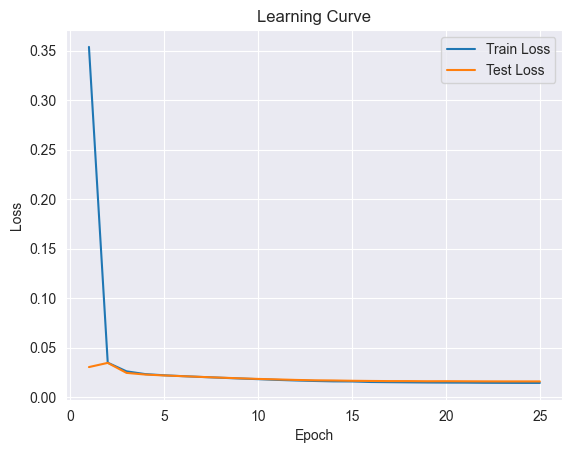

In [148]:
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss') 
plt.plot(epochs, test_losses, label='Test Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Learning Curve') 
plt.legend() 
plt.show()

## Нейросеть с тремя скрытыми слоями

In [149]:
hidden_size1 = 5
hidden_size2 = 4
hidden_size3 = 2

In [150]:
third_model = nn.Sequential()
third_model.add_module("first", nn.Linear(input_size, hidden_size1))
third_model.add_module("first_activation", nn.Sigmoid())
third_model.add_module("second", nn.Linear(hidden_size1, hidden_size2))
third_model.add_module("second_activation", nn.Sigmoid())
third_model.add_module("third", nn.Linear(hidden_size2, hidden_size3))
third_model.add_module("third_activation", nn.Sigmoid())
third_model.add_module("fourth", nn.Linear(hidden_size3, output_size))

In [151]:
loss_fn3 = nn.MSELoss()
third_optimizer = torch.optim.Adam(third_model.parameters(), lr=learning_rate)
third_model.train()

Sequential(
  (first): Linear(in_features=11, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=4, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=4, out_features=2, bias=True)
  (third_activation): Sigmoid()
  (fourth): Linear(in_features=2, out_features=1, bias=True)
)

In [152]:
train_losses = []
test_losses = []

In [153]:
def calculate_loss(model, loss_fn, data_loader):
    total_loss = 0.0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_samples += inputs.size(0)
    return total_loss / total_samples

for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, targets in train_loader:
        third_optimizer.zero_grad()
        outputs = third_model(inputs)
        loss = loss_fn3(outputs, targets)
        loss.backward()
        third_optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    first_model.eval()
    test_loss = calculate_loss(third_model, loss_fn3, test_loader)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Epoch 1/25, Train Loss: 1.5416, Test Loss: 1.1015
Epoch 2/25, Train Loss: 0.8090, Test Loss: 0.5302
Epoch 3/25, Train Loss: 0.3253, Test Loss: 0.1442
Epoch 4/25, Train Loss: 0.0641, Test Loss: 0.0232
Epoch 5/25, Train Loss: 0.0218, Test Loss: 0.0225
Epoch 6/25, Train Loss: 0.0219, Test Loss: 0.0212
Epoch 7/25, Train Loss: 0.0212, Test Loss: 0.0212
Epoch 8/25, Train Loss: 0.0211, Test Loss: 0.0212
Epoch 9/25, Train Loss: 0.0211, Test Loss: 0.0212
Epoch 10/25, Train Loss: 0.0211, Test Loss: 0.0212
Epoch 11/25, Train Loss: 0.0211, Test Loss: 0.0211
Epoch 12/25, Train Loss: 0.0211, Test Loss: 0.0211
Epoch 13/25, Train Loss: 0.0211, Test Loss: 0.0211
Epoch 14/25, Train Loss: 0.0210, Test Loss: 0.0211
Epoch 15/25, Train Loss: 0.0210, Test Loss: 0.0210
Epoch 16/25, Train Loss: 0.0210, Test Loss: 0.0210
Epoch 17/25, Train Loss: 0.0209, Test Loss: 0.0209
Epoch 18/25, Train Loss: 0.0207, Test Loss: 0.0207
Epoch 19/25, Train Loss: 0.0206, Test Loss: 0.0205
Epoch 20/25, Train Loss: 0.0202, Test Lo

В данном случае мы видим, что Train Loss и Test Loss практически не отличаются, что свидетельствует о том, что модель достигла оптимальной производительности.

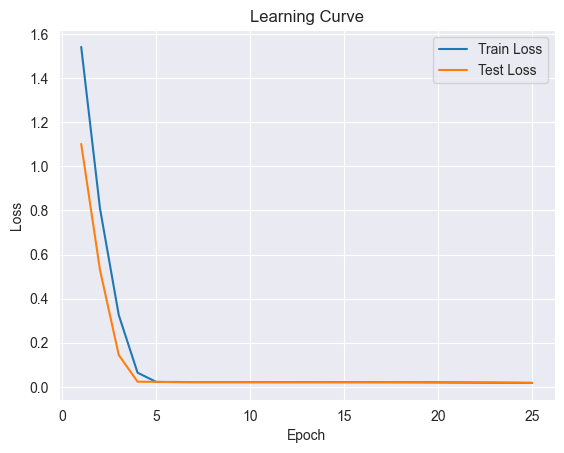

In [154]:
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss') 
plt.plot(epochs, test_losses, label='Test Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Learning Curve') 
plt.legend() 
plt.show()

# 6. Метрики mae

In [155]:
from sklearn.metrics import mean_absolute_error

## Однослойная нейросеть

In [156]:
train_predictions = []
train_targets = []

for inputs, targets in train_loader:
    predictions = first_model(inputs).detach().numpy()
    train_predictions.extend(predictions)

    train_targets.extend(targets.numpy())

train_mae = mean_absolute_error(train_targets, train_predictions)
print("Train test \n MAE:", train_mae)

C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Train test 
 MAE: 0.1268021


In [157]:
test_predictions = []
test_targets = []

for inputs, targets in test_loader:
    predictions = first_model(inputs).detach().numpy()
    test_predictions.extend(predictions)
    
    test_targets.extend(targets.numpy())

test_mae = mean_absolute_error(test_targets, test_predictions)
print("Test test \n MAE:", test_mae)

Test test 
 MAE: 0.13106279


C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


В результате для тренировочной выборки была получена метрика mae, равная 0.126. Иэ этого следует, что предсказанные значения близки к истинным значениям. Кроме того для тестовой выборки значение метрики также недалеки от нуля, что указывает на то, что модель хорошо обучается на новых данных. Разница между тренировочным и тестовым MAE практически отсутствует.

## Нейросеть с одним скрытым слоем

In [158]:
train_predictions = []
train_targets = []

for inputs, targets in train_loader:
    predictions = second_model(inputs).detach().numpy()
    train_predictions.extend(predictions)

    train_targets.extend(targets.numpy())

train_mae = mean_absolute_error(train_targets, train_predictions)
print("Train test \n MAE:", train_mae)

C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Train test 
 MAE: 0.088798776


In [159]:
test_predictions = []
test_targets = []

for inputs, targets in test_loader:
    predictions = second_model(inputs).detach().numpy()
    test_predictions.extend(predictions)
    
    test_targets.extend(targets.numpy())

test_mae = mean_absolute_error(test_targets, test_predictions)
print("Test test \n MAE:", test_mae)

Test test 
 MAE: 0.095534585


C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Для тренировочной выборки средняя абсолютная ошибка равна 0.08. Иэ этого следует, что предсказанные значения близки к истинным значениям. В целом MAE для тренировочного набора близка к MAE для тестового наборов данных, что может свидетельствовать о том, что модель обобщает данные хорошо.

## Нейросеть с тремя скрытыми слоями

In [160]:
train_predictions = []
train_targets = []

for inputs, targets in train_loader:
    predictions = third_model(inputs).detach().numpy()
    train_predictions.extend(predictions)

    train_targets.extend(targets.numpy())

train_mae = mean_absolute_error(train_targets, train_predictions)
print("Train test \n MAE:", train_mae)

C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Train test 
 MAE: 0.10777991


In [161]:
test_predictions = []
test_targets = []

for inputs, targets in test_loader:
    predictions = third_model(inputs).detach().numpy()
    test_predictions.extend(predictions)

    test_targets.extend(targets.numpy())

test_mae = mean_absolute_error(test_targets, test_predictions)
print("Test test \n MAE:", test_mae)

Test test 
 MAE: 0.11020483


C:\Users\Takur\AppData\Local\Temp\ipykernel_10960\2088720507.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = torch.tensor(self.targets.iloc[index], dtype=torch.float32)


Результаты метрик достаточно близки к друг другу, что свидетельствует о том, что модель в целом хорошо справилась с обучением.